In [1]:
# A generic assortment of imports we will likely want as the semester progresses
import matplotlib.pyplot as plt
%matplotlib inline
import random as random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [5]:
!pip install scikit-learn==1.2.2
from imblearn.over_sampling import SMOTE


In [6]:
#dataset:
# https://www.kaggle.com/datasets/varlawend/competitive-pokmon-tier-dataset/?select=pokemon_data.csv


In [7]:
'''

This dataset was collected by another pokemon fan for the same purpose as this notebook: to 
attempt to use machine learning to predict the competetive tier of a pokemon
The stats of pokemon and other competitive information was gathered and compiled into this dataset

This is a classification, and since the goal is simply to predict the correct tier of pokemon, accuracy is a
good measure of effectiveness

'''

'\n\nThis dataset was collected by another pokemon fan for the same purpose as this notebook: to \nattempt to use machine learning to predict the competetive tier of a pokemon\nThe stats of pokemon and other competitive information was gathered and compiled into this dataset\n\nThis is a classification, and since the goal is simply to predict the correct tier of pokemon, accuracy is a\ngood measure of effectiveness\n\n'

In [8]:
'''

The original creator of the dataset also tried to predict the tiers of pokemon with it. 
They used randomforest, kmeans clustering, pca, and both forms of regression present in this notebook.
However, they didn't use SMOTE, KNN, Naives Bayes, or a basic Decision Tree

'''

"\n\nThe original creator of the dataset also tried to predict the tiers of pokemon with it. \nThey used randomforest, kmeans clustering, pca, and both forms of regression present in this notebook.\nHowever, they didn't use SMOTE, KNN, Naives Bayes, or a basic Decision Tree\n\n"

In [9]:
'''

There are 4 main groups of data

Stats, which range from double to triple digit numbers. These are the actual stats for pokemon in the games, such as
attack, health, ect. 

Cutoffs, which serve as markers for a pokemon. Each stat and some other parts of pokemon, such as abilities, have these cutoffs.
These are boolean in nature, and serve for markers of how proficient a pokemon is in a given field. 
For example, if a pokemon has 1, or true, for it's physical attack cutoff 2, then it's attack stats and moves make it a 
better physical attacker than any pokemon that isn't at least at the physical attack cutoff 2. 

Roles describe how a pokemon functions in battle, such as cleric for pokemon specialized in support or pivot for pokemon
meant to help other pokemon switch in safely. These range from being boolean to being on small scales, being from 0-20 at most.
These also include information on the effectiveness of a pokemon's type(s).

Out of battle information is string based, and doesn't have to do with a pokemon's direct combat capability. 
These are the only nominal data entries, and include the pokemon's tiering information and it's original generation

'''

"\n\nThere are 4 main groups of data\n\nStats, which range from double to triple digit numbers. These are the actual stats for pokemon in the games, such as\nattack, health, ect. \n\nCutoffs, which serve as markers for a pokemon. Each stat and some other parts of pokemon, such as abilities, have these cutoffs.\nThese are boolean in nature, and serve for markers of how proficient a pokemon is in a given field. \nFor example, if a pokemon has 1, or true, for it's physical attack cutoff 2, then it's attack stats and moves make it a \nbetter physical attacker than any pokemon that isn't at least at the physical attack cutoff 2. \n\nRoles describe how a pokemon functions in battle, such as cleric for pokemon specialized in support or pivot for pokemon\nmeant to help other pokemon switch in safely. These range from being boolean to being on small scales, being from 0-20 at most.\nThese also include information on the effectiveness of a pokemon's type(s).\n\nOut of battle information is strin

In [10]:
#ensures randomn elements occur the same way when the notebook is reset, useful for testing
#change if you want to test without predetermined randomness
seed = random.seed(42)

In [11]:
#data import statement
poke = pd.read_csv(r"C:\Users\cmlon\Downloads\pokemon_data.csv")

In [12]:
poke.head()

,name,hp,atk,def,spa,spd,spe,weight,height,formats,...,Ability Cutoff 2,Ability Cutoff 3,Ability Cutoff 4,Ability Cutoff 5,Ability Cutoff 6,Best Ability,Best Ability <100,Unique Powerful Ability,oldformats,oldformat codes
0,Bulbasaur,45,49,49,65,65,45,6.9,0.7,ZU,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,ZU,0
1,Ivysaur,60,62,63,80,80,60,13.0,1.0,ZU,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,ZU,0
2,Venusaur,80,82,83,100,100,80,100.0,2.0,OU,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,UU,4
3,Charmander,39,52,43,60,50,65,8.5,0.6,ZU,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,ZU,0
4,Charmeleon,58,64,58,80,65,80,19.0,1.1,ZU,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,ZU,0


In [13]:
poke.shape

(738, 71)

In [14]:
#seperating the data for each grouping
#the pokemon tiers are split into high, mid, and low based on their original tier
data = poke.copy()
high_tier = data[(data['formats'] == 'Uber') | (data['formats'] == 'OU')]
mid_tier = data[(data['formats'] == 'UU') | (data['formats'] == 'RU') | (data['formats'] == 'NU')]
low_tier = data[(data['formats'] =='ZU') | (data['formats']=='PU')]

high_tier.head(10)
#mid_tier.head(5)
#low_tier.head(5)
#these dataframes are for each of the different groups of pokemon

,name,hp,atk,def,spa,spd,spe,weight,height,formats,...,Ability Cutoff 2,Ability Cutoff 3,Ability Cutoff 4,Ability Cutoff 5,Ability Cutoff 6,Best Ability,Best Ability <100,Unique Powerful Ability,oldformats,oldformat codes
2,Venusaur,80,82,83,100,100,80,100.0,2.0,OU,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,UU,4
21,Nidoking,81,102,77,85,75,85,62.0,1.4,OU,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,OU,5
23,Clefable,95,70,73,95,90,60,40.0,1.3,Uber,...,1.0,1.0,1.0,1.0,1.0,100.000000,50.000000,0,OU,5
46,Alakazam,55,50,45,135,95,120,48.0,1.5,OU,...,1.0,1.0,1.0,1.0,1.0,100.000000,27.272727,0,OU,5
55,Slowbro,95,75,110,100,80,30,78.5,1.6,OU,...,1.0,1.0,1.0,1.0,1.0,100.000000,37.500000,0,OU,5
63,Gengar,60,65,60,130,75,110,40.5,1.5,OU,...,1.0,1.0,0.0,0.0,0.0,71.428571,71.428571,0,OU,5
110,Zapdos,90,90,85,125,90,100,52.6,1.6,OU,...,1.0,1.0,0.0,0.0,0.0,65.217391,65.217391,0,OU,5
111,Moltres,90,100,90,125,85,90,60.0,2.0,OU,...,1.0,1.0,0.0,0.0,0.0,66.666667,66.666667,0,UU,4
114,Dragonite,91,134,95,100,100,80,210.0,2.2,OU,...,1.0,1.0,1.0,1.0,1.0,100.000000,26.315789,0,OU,5
115,Mewtwo,106,110,90,154,90,130,122.0,2.0,Uber,...,1.0,1.0,0.0,0.0,0.0,65.217391,65.217391,0,Uber,6


In [15]:
#instead of seperating the new tiers into its own data frame, 
#replace with low,mid,high in one dataframe
test = poke.copy()
test.replace({'Uber': 'high', 'OU': 'high'}, inplace = True)
test.replace({'UU': 'mid', 'RU': 'mid', 'NU': 'mid'},inplace = True)
test.replace({'ZU': 'low', 'PU': 'low'},inplace = True)
test.head(10)

,name,hp,atk,def,spa,spd,spe,weight,height,formats,...,Ability Cutoff 2,Ability Cutoff 3,Ability Cutoff 4,Ability Cutoff 5,Ability Cutoff 6,Best Ability,Best Ability <100,Unique Powerful Ability,oldformats,oldformat codes
0,Bulbasaur,45,49,49,65,65,45,6.9,0.7,low,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,low,0
1,Ivysaur,60,62,63,80,80,60,13.0,1.0,low,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,low,0
2,Venusaur,80,82,83,100,100,80,100.0,2.0,high,...,1.0,0.0,0.0,0.0,0.0,63.636364,63.636364,0,mid,4
3,Charmander,39,52,43,60,50,65,8.5,0.6,low,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,0
4,Charmeleon,58,64,58,80,65,80,19.0,1.1,low,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,0
5,Charizard,78,84,78,109,85,100,90.5,1.7,low,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,1
6,Squirtle,44,48,65,50,64,43,9.0,0.5,low,...,1.0,1.0,1.0,0.0,0.0,75.000000,75.000000,0,low,0
7,Wartortle,59,63,80,65,80,58,22.5,1.0,low,...,1.0,1.0,1.0,0.0,0.0,75.000000,75.000000,0,low,0
8,Blastoise,79,83,100,85,105,78,85.5,1.6,mid,...,1.0,1.0,1.0,0.0,0.0,75.000000,75.000000,0,mid,2
9,Caterpie,45,30,35,20,20,45,2.9,0.3,low,...,1.0,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,0


<Axes: >

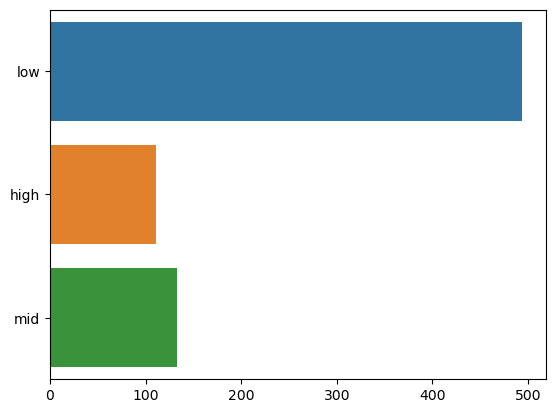

In [16]:
#seeing the result in a counter
y = test['formats']

counts = Counter(y)
names = dict(counts)
keys = list(names.keys())
values = list(names.values())
sns.barplot(x=values, y = keys)

In [17]:
#set up for box plots, seperating into stat lists 
tier_names = ['Uber', 'OU', 'UU', 'RU', 'NU', 'ZU', 'PU']

hp_list =[]
def_list=[]
spa_list=[]
spd_list=[]

for tier in tier_names:
    hp_list.append(data[data['formats'] ==tier]['hp'])
    
for tier in tier_names:
    def_list.append(data[data['formats'] ==tier]['def'])

for tier in tier_names:
    spa_list.append(data[data['formats'] == tier]['spa'])

for tier in tier_names:
    spd_list.append(data[data['formats'] == tier]['spd'])

In [18]:
#for later ref https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/
#calculating and visualizing the stats per tier
def create_df():
    stat_data = {
        'Tier': ['uber', 'ou', 'uu', 'ru', 'nu', 'zu', 'pu'],
        'Min':  [0, 0, 0, 0, 0, 0, 0],
        'Mean': [0, 0, 0, 0, 0, 0, 0],
        'Max':  [0, 0, 0, 0, 0, 0, 0],
    }
    stat_df = pd.DataFrame(stat_data)
    return stat_df
    
def populate_df(df, stat_list,stat_name):
    for i in range(len(tier_names)):
        temp_min = stat_list[i].min()
        temp_mean = int(stat_list[i].mean())
        temp_max = stat_list[i].max()

        df.at[i, 'Min'] = temp_min
        df.at[i, 'Mean'] = temp_mean
        df.at[i, 'Max'] = temp_max
    print(stat_name,df, '\n')
    
populate_df(create_df(),hp_list,'hp')
populate_df(create_df(),def_list,'def')
populate_df(create_df(),spa_list,'spa')
populate_df(create_df(),spd_list,'spd')

hp    Tier  Min  Mean  Max
0  uber   50   103  255
1    ou   50    83  135
2    uu   50    88  250
3    ru   50    80  200
4    nu   48    82  223
5    zu    1    57  190
6    pu   20    74  150 

def    Tier  Min  Mean  Max
0  uber   10    98  152
1    ou   45    91  143
2    uu    5    83  150
3    ru   40    93  211
4    nu   50    87  130
5    zu    5    59  160
6    pu   20    86  230 

spa    Tier  Min  Mean  Max
0  uber   30   106  170
1    ou   45    95  151
2    uu   35    93  145
3    ru   30    78  173
4    nu   40    88  145
5    zu   10    55  125
6    pu   10    75  145 

spd    Tier  Min  Mean  Max
0  uber   37    96  154
1    ou   31    88  140
2    uu   55    92  150
3    ru   40    80  150
4    nu   50    86  150
5    zu   20    56  131
6    pu   20    83  230 



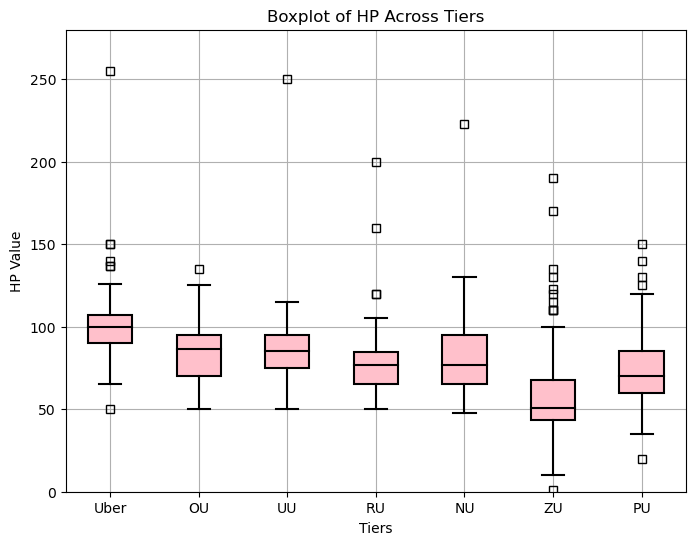

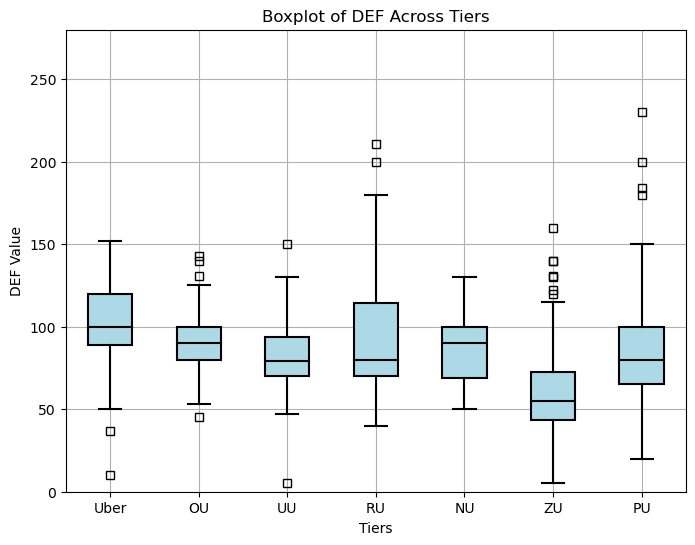

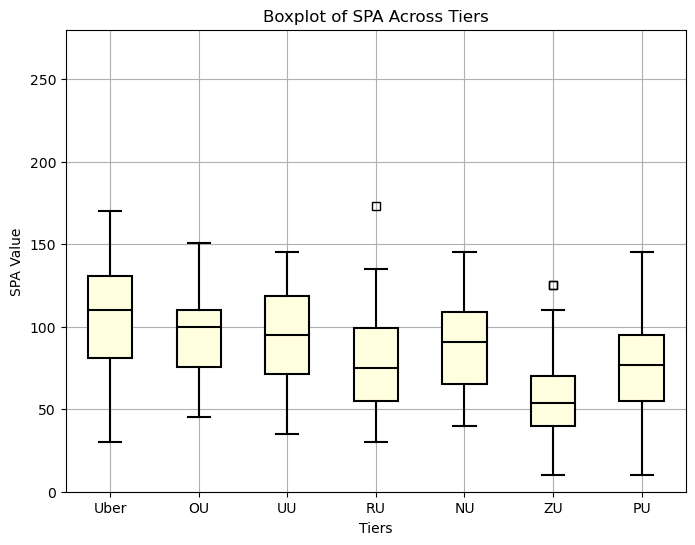

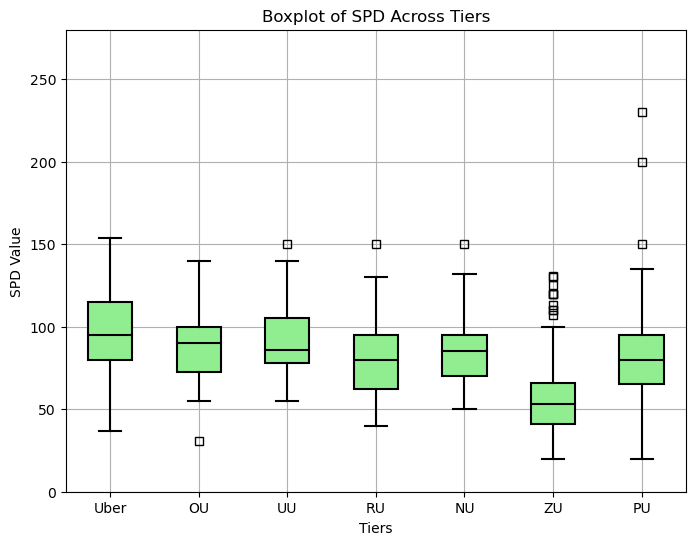

In [19]:
#creating the box plots accross tiers
def create_plot(stat_str, stat_list,box_color):
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(0, 280)
    
    # Customization
    boxprops = dict(facecolor= box_color, linewidth = 1.5)
    flierprops = dict(marker = "s")
    medianprops = dict(color = 'black', linewidth = 1.5)
    whiskerprops = dict(linewidth = 1.5)
    capprops = dict(linewidth = 1.5)
    
    #labels
    x_labels = ['Uber', 'OU', 'UU', 'RU', 'NU', 'ZU', 'PU']
    plt.title('Boxplot of ' + stat_str + ' Across Tiers')
    plt.xlabel('Tiers')
    plt.ylabel(stat_str + ' Value')
    
    # Creating the box plot
    plt.boxplot(stat_list, labels=x_labels, patch_artist = True,
                boxprops=boxprops,flierprops = flierprops, 
                medianprops = medianprops, whiskerprops = whiskerprops,
                capprops=capprops)
    plt.grid()
    plt.show()
    
create_plot('HP', hp_list, 'pink')
create_plot('DEF', def_list, 'lightblue')
create_plot('SPA', spa_list, 'lightyellow')
create_plot('SPD', spd_list, 'lightgreen')

In [20]:
#replacing the original tiers with the modified ones
poke = test.copy()

In [21]:
#finding all columns with string values
contains_str = poke.select_dtypes(include='object')
print(contains_str.keys())

#creating a copy dataframe and dropping columns w/ strings
#incoding tiers to low = 0, mid = 1, high = 2
smote_data = poke.drop(['name', 'generation'],axis =1)
smote_data.replace({'high': 2}, inplace = True)
smote_data.replace({'mid': 1},inplace = True)
smote_data.replace({'low': 0},inplace = True)

Index(['name', 'formats', 'generation', 'oldformats'], dtype='object')


In [22]:
#preparing for train test split
X_smote = smote_data.drop(['formats', 'format codes'], axis = 1) 
y_smote = smote_data['formats']

#scale data appropriately
scaler = MinMaxScaler() 
scaler.fit(X_smote)
scaled_data = scaler.transform(X_smote)

X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(scaled_data, y_smote, test_size=0.2, random_state=42, stratify=y)

#
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_after_smote, y_after_smote = smote.fit_resample(X_smote_train, y_smote_train)

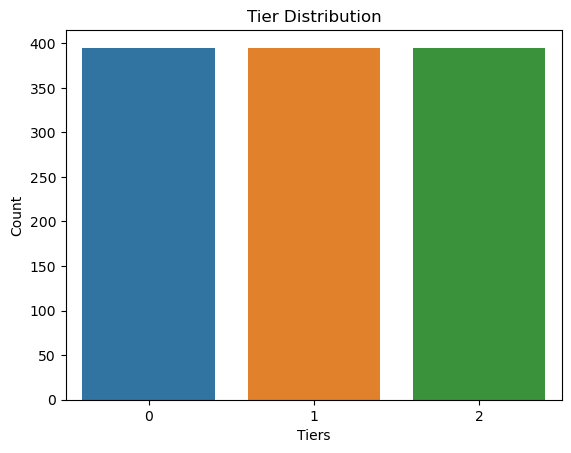

0 395
1 395
2 395


In [23]:
#visualizing the new distribution of data after SMOTE
def plot_smote_data():
    counts_after_smote = Counter(y_after_smote)
    after_smote = dict(counts_after_smote)

    sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()))
    
    plt.xlabel('Tiers')
    plt.ylabel('Count')
    plt.title('Tier Distribution')
    plt.show()

    for tier, occurence in counts_after_smote.items():
        print(tier, occurence)
    
plot_smote_data()

In [24]:
X_after_smote.shape

(1185, 67)

In [25]:
y_after_smote.shape

(1185,)

In [26]:
#see how the number of rows add up to the number in the initial shape
print(X_smote_train.shape)
print(X_smote_test.shape)
print(y_smote_train.shape)
print(y_smote_test.shape)

(590, 67)
(148, 67)
(590,)
(148,)


In [27]:
#check the target class
formats = set(y_smote_train)
print(formats)

{0, 1, 2}


In [28]:
#create a function to cross validate data
#it takes in the model to be used for the cross validation,
#and it also takes in the X_train as different models are fit
#on different X_train column numbers due to PCA

def crosser(model, attributes):
    k_fold = KFold(n_splits=5, shuffle=True, random_state = 42)
    return sum(cross_val_score(model,attributes,y_smote_train,cv=k_fold,scoring='accuracy')/5)

In [29]:
#create a function that prints a confusion matrix 
#given a set of predictions
#it also takes in a title for the matrix
def print_confusion_matrix(predictions, titl):
    confuse = confusion_matrix(y_smote_test, predictions)
    confusion = sns.heatmap(confuse, annot=True, fmt='d', cmap = 'Blues')
    confusion.set(xlabel = "predicted", ylabel = "actual", title = titl)
    confusion.xaxis.set_ticklabels(["low", "mid", "high"])
    confusion.yaxis.set_ticklabels(["low", "mid", "high"])
    plt.show()

    
#print the accuracy for a given set of predictions on X_test
def print_accuracy(predictions):
    last = predictions == y_smote_test

    series = 0
    for item in last:
        if item == True:
            series +=1

    print("The accuracy on the test data is " + str(series/last.count()))

In [30]:
#get the best hyperparameter from a list of resutlts. If necessary, it also returns the position of the best arguement
#so the PCA number can be determined
def getbestresults(lst):
    store = []
    for item in lst:
        store.append(item[0])

    print(lst)
    print("the best performing dataset had an accuracy of " , max(store), " and was in position ", np.argmax(store))
    print("it had" , lst[np.argmax(store)][1], "as it's hyperparameter value")
    return np.argmax(store) , lst[np.argmax(store)][1]

In [31]:
#use PCA to get many different datasets to test on, ranging from 
# .5 data variance to .85 data variance maintained
#above.85, PCA breaks some algorithms, so it is avoided

datasetstrain = []
datasetstrain.append(X_smote_train)

datasetstest = []
datasetstest.append(X_smote_test)
for j in range(10, 17, 1):
    #create the PCA dataset and store it
    pca = PCA(j/20)

    pca.fit(X_smote_train)

    pca_data = pca.transform(X_smote_train)

    principal_df = pd.DataFrame(pca_data)
    
    #do the same for both the train and test sets
    
    pca_data2 = pca.transform(X_smote_test)
    
    final_df = pd.DataFrame(pca_data2)
    
    
    #check to see if another dataset has the same number of columns
    #if it doesn't it likely doesn't have much more variance than the dataset with the same number,
    #so don't store it
    check = True
    
    for item in datasetstrain:
        if item.shape[1] == principal_df.shape[0]:
            check = False
    if check:
        datasetstrain.append(principal_df)
        datasetstest.append(final_df)


#this code can be used to generate many different PCA values to play with


#check the rows in train and test to make sure the left hand column never changes
#and the right hand column is the same as the other list's right hand column at that index.
for item in datasetstrain:
    print(item.shape)
    
print('\n')
for item in datasetstest:
    print(item.shape)

(590, 67)
(590, 5)
(590, 6)
(590, 7)
(590, 8)
(590, 10)
(590, 12)
(590, 15)


(148, 67)
(148, 5)
(148, 6)
(148, 7)
(148, 8)
(148, 10)
(148, 12)
(148, 15)


In [32]:
#KNN
#the hyperparameters are the PCA model, the number of neighbors, and the distance metric
#euclidean metric
#store the results for each PCA model
eu_results = []

for item in datasetstrain:   
    #store the results for a specific PCA model
    eu_best = []
    for i in range(1,50):
        #for each PCA, sweep through knum 1-50 to find the best knum
        knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
        knn.fit(item, y_smote_train)
        eu_best.append([crosser(knn, item),i])
    eu_results.append(max(eu_best))
    
#cosine metric
cos_results = []

for item in datasetstrain:    
    cos_best = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
        knn.fit(item, y_smote_train)
        cos_best.append([crosser(knn, item),i])
    cos_results.append(max(cos_best))

In [33]:
#manhattan metric
man_results = []

for item in datasetstrain:    
    man_best = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
        knn.fit(item, y_smote_train)
        man_best.append([crosser(knn, item),i])
    man_results.append(max(man_best))
    
#chebyshev metric
cheb_results = []

for item in datasetstrain:    
    cheb_best = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i, metric="chebyshev")
        knn.fit(item, y_smote_train)
        cheb_best.append([crosser(knn, item),i])
    cheb_results.append(max(cheb_best))

In [34]:
#grab the position of the best model in the list of PCA models and grab it's best number of neighbors
eu_position, eu_num = getbestresults(eu_results)
cos_position, cos_num = getbestresults(cos_results)

[[0.8050847457627119, 3], [0.8050847457627118, 14], [0.7898305084745764, 7], [0.811864406779661, 5], [0.8372881355932202, 1], [0.8457627118644068, 3], [0.8271186440677964, 3], [0.8355932203389831, 3]]
the best performing dataset had an accuracy of  0.8457627118644068  and was in position  5
it had 3 as it's hyperparameter value
[[0.8305084745762713, 17], [0.8, 15], [0.7847457627118644, 7], [0.823728813559322, 5], [0.835593220338983, 1], [0.847457627118644, 5], [0.8372881355932202, 5], [0.8355932203389831, 5]]
the best performing dataset had an accuracy of  0.847457627118644  and was in position  5
it had 5 as it's hyperparameter value


In [35]:
man_position, man_num = getbestresults(man_results)
cheb_position, cheb_num = getbestresults(cheb_results)

[[0.8152542372881355, 6], [0.8050847457627119, 9], [0.7779661016949152, 6], [0.8016949152542373, 7], [0.8186440677966101, 5], [0.8372881355932202, 3], [0.8084745762711865, 1], [0.811864406779661, 3]]
the best performing dataset had an accuracy of  0.8372881355932202  and was in position  5
it had 3 as it's hyperparameter value
[[0.688135593220339, 2], [0.7983050847457627, 4], [0.793220338983051, 7], [0.823728813559322, 1], [0.8593220338983052, 1], [0.8559322033898304, 1], [0.8372881355932205, 1], [0.8389830508474576, 1]]
the best performing dataset had an accuracy of  0.8593220338983052  and was in position  4
it had 1 as it's hyperparameter value


In [36]:
#euclidean predictions
knn = KNeighborsClassifier(n_neighbors=eu_num, metric='euclidean')
knn.fit(datasetstrain[eu_position], y_smote_train)

predictions = knn.predict(datasetstest[eu_position])

last = predictions == y_smote_test

#cosine predictions
knn2 = KNeighborsClassifier(n_neighbors=cos_num, metric="cosine")
knn2.fit(datasetstrain[cos_position], y_smote_train)

predictions2 = knn2.predict(datasetstest[cos_position])

last = predictions2 == y_smote_test

In [37]:
#manhattan predictions
knn3 = KNeighborsClassifier(n_neighbors=man_num, metric="manhattan")
knn3.fit(datasetstrain[man_position], y_smote_train)

predictions3 = knn3.predict(datasetstest[man_position])

last = predictions3 == y_smote_test

#chebyshev predictions
knn4 = KNeighborsClassifier(n_neighbors=cheb_num, metric="chebyshev")
knn4.fit(datasetstrain[cheb_position], y_smote_train)

predictions4 = knn4.predict(datasetstest[cheb_position])

last = predictions4 == y_smote_test

In [38]:
print_accuracy(predictions)
#for euclidean

The accuracy on the test data is 0.8378378378378378


In [39]:
print_accuracy(predictions2)
#for cosine

The accuracy on the test data is 0.8513513513513513


In [40]:
print_accuracy(predictions3)
#for manhattan

The accuracy on the test data is 0.831081081081081


In [41]:
print_accuracy(predictions4)
#for chebychev

The accuracy on the test data is 0.8445945945945946


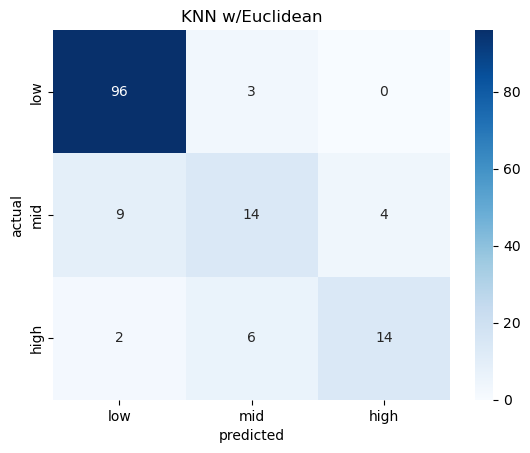

In [42]:
print_confusion_matrix(predictions, "KNN w/Euclidean")

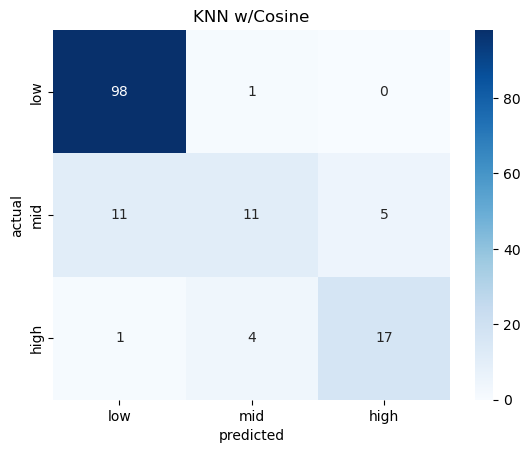

In [43]:
print_confusion_matrix(predictions2, "KNN w/Cosine")

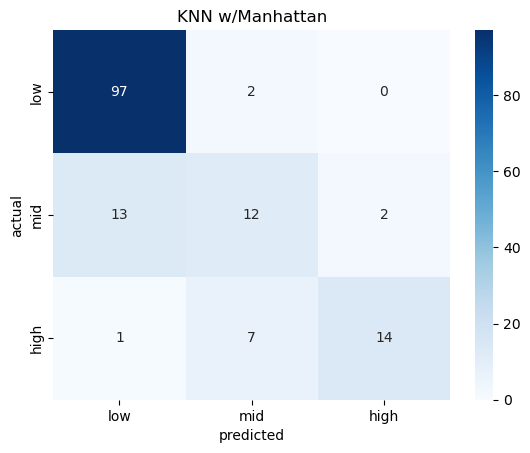

In [44]:
print_confusion_matrix(predictions3, "KNN w/Manhattan")

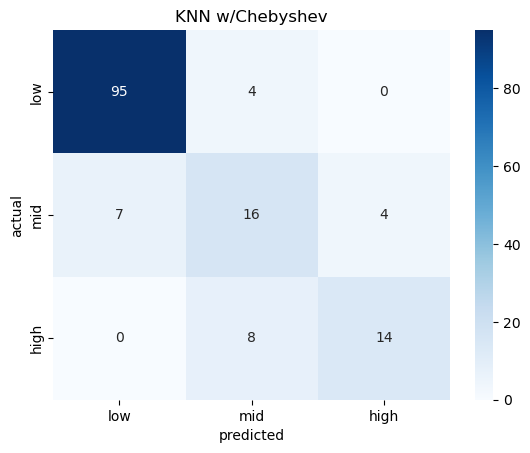

In [45]:
print_confusion_matrix(predictions4, "KNN w/Chebyshev")

In [46]:
#NaiveBayes
#sweep through alpha values as the hyperparameter
#due to problems with PCA usage in KNN,
#pca won't be used for the rest of the models
alpha_values = np.logspace(-5, 5, num=11)

resultsnb = []

for value in alpha_values:
    nb = MultinomialNB(alpha = value)
    resultsnb.append([crosser(nb, datasetstrain[0]),value])

In [47]:
position, num = getbestresults(resultsnb)
#here position is unecessary as we just need the hyperparameter (no pca is checked)
#but we still need to unpack it

[[0.8932203389830509, 1e-05], [0.8932203389830509, 0.0001], [0.8932203389830509, 0.001], [0.8949152542372882, 0.01], [0.8932203389830509, 0.1], [0.888135593220339, 1.0], [0.8118644067796611, 10.0], [0.6745762711864407, 100.0], [0.6694915254237288, 1000.0], [0.6694915254237288, 10000.0], [0.6694915254237288, 100000.0]]
the best performing dataset had an accuracy of  0.8949152542372882  and was in position  3
it had 0.01 as it's hyperparameter value


In [48]:
nb = MultinomialNB(alpha = num)

nb.fit(datasetstrain[0],y_smote_train)

predictions = nb.predict(datasetstest[0])

In [49]:
print_accuracy(predictions)

The accuracy on the test data is 0.8581081081081081


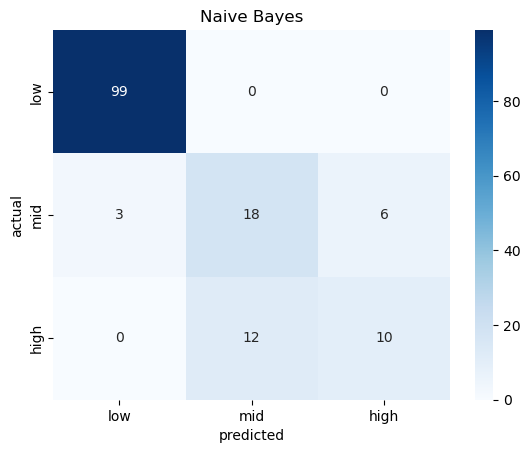

In [50]:
print_confusion_matrix(predictions, "Naive Bayes")

In [51]:
#Decision Tree
#the hyperparameter is the max depth
scores = []
for i in range(2,21,1):
    newtree =  tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    scores.append([crosser(newtree, datasetstrain[0]),i])

In [52]:
position, num = getbestresults(scores)

[[0.9627118644067796, 2], [0.9593220338983052, 3], [0.9474576271186441, 4], [0.9576271186440677, 5], [0.952542372881356, 6], [0.9474576271186441, 7], [0.9491525423728814, 8], [0.9508474576271186, 9], [0.9576271186440679, 10], [0.9559322033898305, 11], [0.9491525423728813, 12], [0.9508474576271186, 13], [0.952542372881356, 14], [0.9542372881355932, 15], [0.9542372881355932, 16], [0.9542372881355932, 17], [0.9542372881355932, 18], [0.9508474576271186, 19], [0.9457627118644067, 20]]
the best performing dataset had an accuracy of  0.9627118644067796  and was in position  0
it had 2 as it's hyperparameter value


In [53]:
poke_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=num)
poke_tree.fit(X_smote_train, y_smote_train)
predictions = poke_tree.predict(X_smote_test)

In [54]:
print_accuracy(predictions)

The accuracy on the test data is 0.9459459459459459


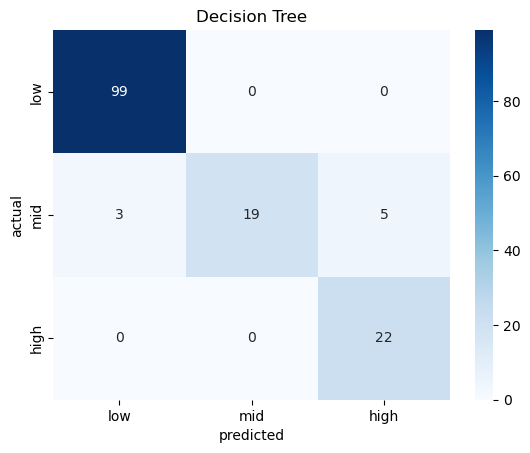

In [55]:
print_confusion_matrix(predictions, "Decision Tree")

[Text(0.5, 0.8333333333333334, 'Ability Cutoff 6 <= 0.25\nentropy = 1.244\nsamples = 590\nvalue = [395, 106, 89]\nclass = 0'),
 Text(0.25, 0.5, 'Best Ability <= 0.083\nentropy = 0.18\nsamples = 406\nvalue = [395, 11, 0]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.084\nsamples = 380\nvalue = [376, 4, 0]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.84\nsamples = 26\nvalue = [19, 7, 0]\nclass = 0'),
 Text(0.75, 0.5, 'Best Ability <= 0.583\nentropy = 0.999\nsamples = 184\nvalue = [0, 95, 89]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84, 0]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.5\nsamples = 100\nvalue = [0, 11, 89]\nclass = 2')]

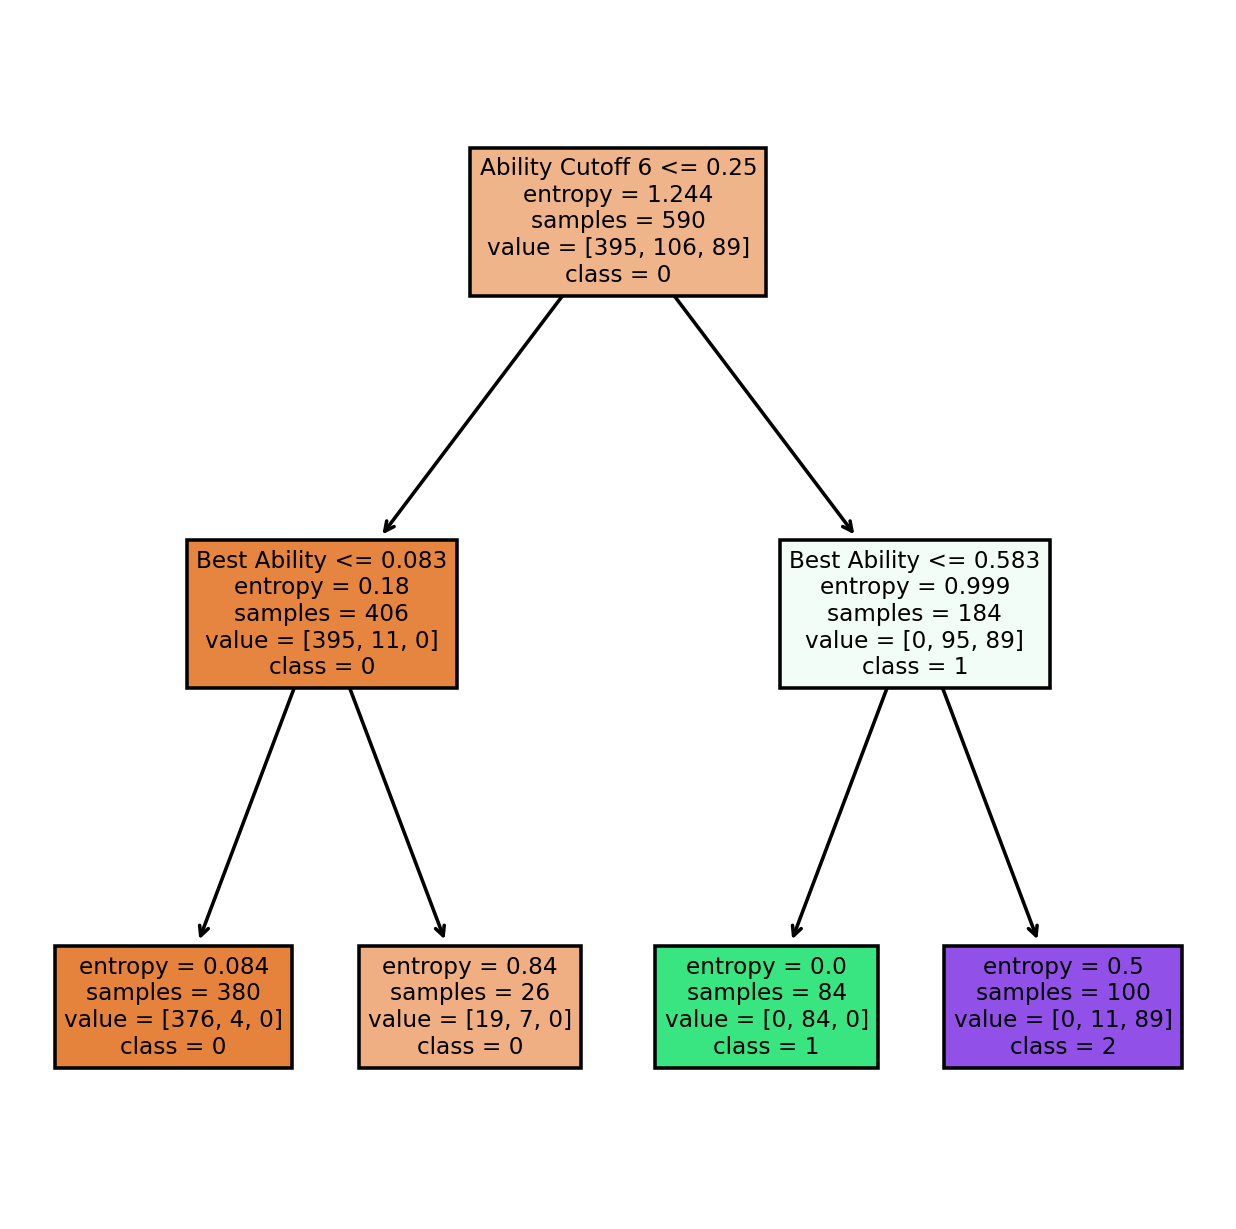

In [56]:
#print the decision tree to view it
feature_names = list(poke.columns)
class_names = [str(i) for i in formats]


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 2**8-1)

tree.plot_tree(poke_tree,
               feature_names = feature_names, 
               class_names = class_names,
              filled = True)

#reminder: 0=low, 1 = mid, 2 = high

In [57]:
poke_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.75734635, 0.24265365])

In [58]:
#Random Forest
#the hyperparameter is also the max depth
scoresf = []
for i in range(2,21,1):
    newforest =  RandomForestClassifier(criterion="entropy", max_depth = i, n_estimators = 100)
    scoresf.append([crosser(newforest, datasetstrain[0]),i])

In [59]:
position, num = getbestresults(scoresf)

[[0.8796610169491527, 2], [0.9338983050847458, 3], [0.9355932203389831, 4], [0.9406779661016949, 5], [0.9338983050847458, 6], [0.9423728813559322, 7], [0.9423728813559322, 8], [0.9440677966101694, 9], [0.9491525423728815, 10], [0.9491525423728813, 11], [0.9423728813559322, 12], [0.9389830508474577, 13], [0.9372881355932203, 14], [0.9355932203389831, 15], [0.9372881355932203, 16], [0.9423728813559321, 17], [0.9423728813559322, 18], [0.9406779661016951, 19], [0.9423728813559322, 20]]
the best performing dataset had an accuracy of  0.9491525423728815  and was in position  8
it had 10 as it's hyperparameter value


In [60]:
poke_forest = RandomForestClassifier(criterion="entropy", max_depth=num,n_estimators=100)
poke_forest.fit(X_smote_train, y_smote_train)
predictions = poke_forest.predict(X_smote_test)

In [61]:
print_accuracy(predictions)

The accuracy on the test data is 0.9459459459459459


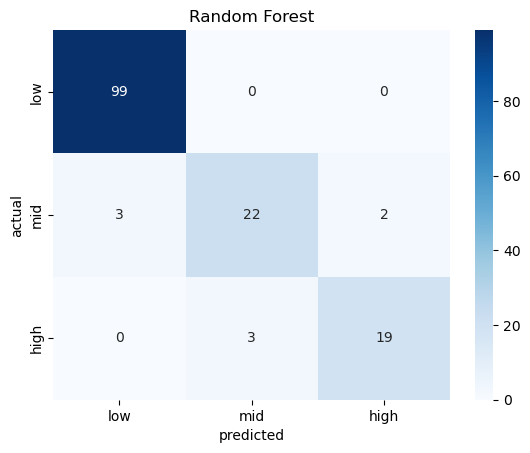

In [62]:
print_confusion_matrix(predictions, "Random Forest")

In [63]:
#linear Regression
#the y_train and y_test is converted to a numerical scale to work with regressions
lin = LinearRegression()
y_train_copy = y_smote_train.copy()
y_train_copy.replace({0: 100}, inplace = True)
y_train_copy.replace({2: 300},inplace = True)
y_train_copy.replace({1: 200},inplace = True)

In [64]:
y_test_copy = y_smote_test.copy()
y_test_copy.replace({0: 100}, inplace = True)
y_test_copy.replace({2: 300},inplace = True)
y_test_copy.replace({1: 200},inplace = True)

In [65]:
lin.fit(X_smote_train, y_train_copy)
predictions = lin.predict(X_smote_test)

Text(0, 0.5, 'predicted tier')

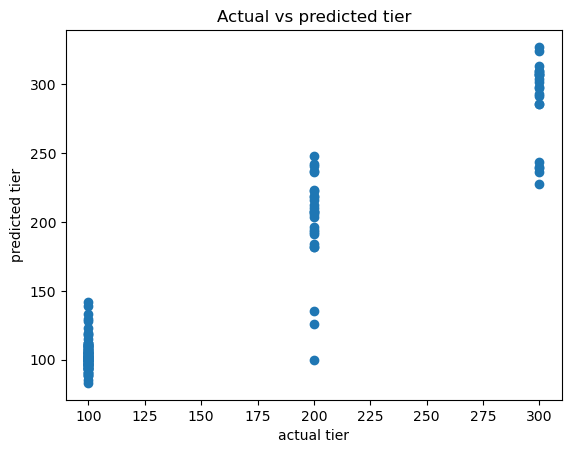

In [66]:
plt.scatter(y_test_copy, predictions)
plt.title("Actual vs predicted tier")
plt.xlabel("actual tier")
plt.ylabel("predicted tier")

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test_copy, predictions))
print('MSE:', metrics.mean_squared_error(y_test_copy, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_copy, predictions)))

#convert the outputs back to the original to predict the tier
#each item is predicted to be in the tier group that it is closest to
#for example, 136 is closest to 100, which is low tier, so predict low tier
store = []
for item in predictions:
    if item < 150:
        store.append(0)
    elif item < 250:
        store.append(1)
    else:
        store.append(2)

sum([1 for i in zip(y_smote_test,store) if i[0]==i[1]])/len(predictions)

MAE: 12.598975929054054
MSE: 441.31641738479203
RMSE: 21.007532396376117


0.9459459459459459

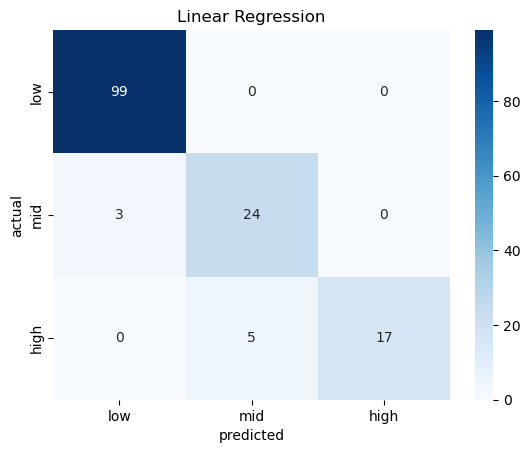

In [68]:
print_confusion_matrix(store, "Linear Regression")

In [69]:
#view the importances of the attributes for linear regression
coeff_df = pd.DataFrame(lin.coef_,X_smote.columns,columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by = 'Coefficient')
coeff_df

,Coefficient
Resistance Index,-1.962567e+14
Weaknesses,-6.244533e+13
Strong Weaknesses,-3.568304e+13
Special Coverage 3,-1.470674e+02
Physical Cutoff 2,-8.364038e+01
...,...
Special Cutoff 4,1.110259e+02
oldformat codes,1.517852e+02
Strong Resists,8.920761e+13
Resists,8.920761e+13


In [70]:
#Logistic Regression
#the hyperparamter is the c value
scores = []
for i in range(-10,11,1):
    c = 10 ** i
    log = LogisticRegression(C=c,max_iter=10000)
    scores.append([crosser(log, datasetstrain[0]),c])


In [71]:
position, num = getbestresults(scores)

[[0.6694915254237288, 1e-10], [0.6694915254237288, 1e-09], [0.6694915254237288, 1e-08], [0.6694915254237288, 1e-07], [0.6694915254237288, 1e-06], [0.6694915254237288, 1e-05], [0.6694915254237288, 0.0001], [0.6694915254237288, 0.001], [0.7254237288135592, 0.01], [0.8813559322033898, 0.1], [0.9423728813559322, 1], [0.9423728813559322, 10], [0.9389830508474576, 100], [0.9288135593220339, 1000], [0.9288135593220339, 10000], [0.9237288135593221, 100000], [0.9220338983050848, 1000000], [0.9288135593220339, 10000000], [0.9372881355932203, 100000000], [0.9372881355932203, 1000000000], [0.9389830508474576, 10000000000]]
the best performing dataset had an accuracy of  0.9423728813559322  and was in position  10
it had 1 as it's hyperparameter value


In [72]:
finlog = LogisticRegression(C=num,max_iter=10000)
finlog.fit(X_smote_train, y_train_copy)
predictions = finlog.predict(X_smote_test)

Text(0, 0.5, 'predicted tier')

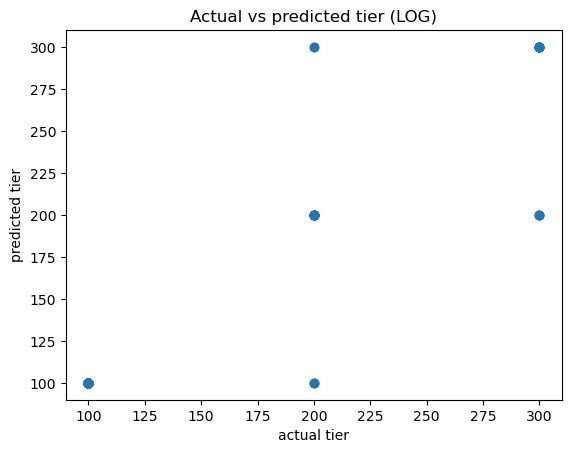

In [73]:
plt.scatter(y_test_copy, predictions)
plt.title("Actual vs predicted tier (LOG)")
plt.xlabel("actual tier")
plt.ylabel("predicted tier")

In [74]:
print("the accuracy of logistic regression is",sum([1 for i in zip(y_test_copy,predictions) if i[0]==i[1]])/len(predictions))

the accuracy of logistic regression is 0.9391891891891891


In [75]:
print('MAE:', metrics.mean_absolute_error(y_test_copy, predictions))
print('MSE:', metrics.mean_squared_error(y_test_copy, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_copy, predictions)))

MAE: 6.081081081081081
MSE: 608.1081081081081
RMSE: 24.659848095803593


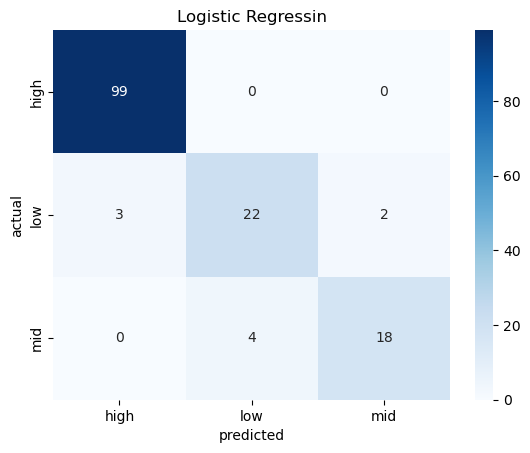

In [76]:
confuse = confusion_matrix(y_test_copy, predictions)
confusion = sns.heatmap(confuse, annot=True, fmt='d', cmap = 'Blues')
confusion.set(xlabel = "predicted", ylabel = "actual", title = "Logistic Regressin")
confusion.xaxis.set_ticklabels(["high", "low", "mid"])
confusion.yaxis.set_ticklabels(["high", "low", "mid"])
plt.show()

In [77]:
#logistic regression has 3 groups of coefficients, all are displayed
coeff_df = pd.DataFrame(finlog.coef_[0],X_smote.columns,columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by = 'Coefficient')
coeff_df

,Coefficient
oldformats,-4.603196
oldformat codes,-4.065785
atk,-0.918806
spa,-0.904677
Special Coverage 10,-0.890675
...,...
Ability Cutoff 2,0.218960
Strong Weaknesses,0.228403
Cleric,0.280157
Setup,0.383013


In [78]:
coeff_df = pd.DataFrame(finlog.coef_[1],X_smote.columns,columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by = 'Coefficient')
coeff_df

,Coefficient
Misc Status,-0.645744
Setup,-0.435442
Weaknesses,-0.402051
oldformat codes,-0.352620
Physical Cutoff 6,-0.259314
...,...
weight,0.491140
Entry Hazards,0.572169
Special Coverage 10,0.795221
atk,0.819033


In [79]:
coeff_df = pd.DataFrame(finlog.coef_[2],X_smote.columns,columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by = 'Coefficient')
coeff_df

,Coefficient
Cleric,-0.639401
Entry Hazards,-0.429815
Strong Resists,-0.303663
Unique Powerful Ability,-0.257345
Best Ability <100,-0.221150
...,...
hp,0.599006
Weather Set,0.686740
STAB,0.702016
oldformats,3.557029


In [80]:
#Kmeans Clustering
kmeans=KMeans(n_clusters=6, random_state=seed)
kmeans.fit(X_smote)

C:\Users\cmlon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cmlon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=6)

In [81]:
poke["Cluster Label"] =kmeans.labels_

In [82]:
poke

,name,hp,atk,def,spa,spd,spe,weight,height,formats,...,Ability Cutoff 3,Ability Cutoff 4,Ability Cutoff 5,Ability Cutoff 6,Best Ability,Best Ability <100,Unique Powerful Ability,oldformats,oldformat codes,Cluster Label
0,Bulbasaur,45,49,49,65,65,45,6.9,0.7,low,...,0.0,0.0,0.0,0.0,63.636364,63.636364,0,low,0,0
1,Ivysaur,60,62,63,80,80,60,13.0,1.0,low,...,0.0,0.0,0.0,0.0,63.636364,63.636364,0,low,0,4
2,Venusaur,80,82,83,100,100,80,100.0,2.0,high,...,0.0,0.0,0.0,0.0,63.636364,63.636364,0,mid,4,5
3,Charmander,39,52,43,60,50,65,8.5,0.6,low,...,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,0,0
4,Charmeleon,58,64,58,80,65,80,19.0,1.1,low,...,0.0,0.0,0.0,0.0,50.000000,50.000000,0,low,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Glastrier,100,145,130,65,110,30,800.0,2.2,mid,...,1.0,1.0,0.0,0.0,75.000000,75.000000,0,mid,2,1
734,Spectrier,100,65,60,145,80,130,44.5,2.0,high,...,0.0,0.0,0.0,0.0,1.000000,0.000000,1,high,6,4
735,Calyrex,100,80,80,80,80,80,7.7,1.1,low,...,0.0,0.0,0.0,0.0,18.181818,18.181818,0,low,0,4
736,Calyrex-Ice,100,165,150,85,130,50,809.1,2.4,high,...,0.0,0.0,0.0,0.0,1.000000,0.000000,1,high,6,1


In [83]:
for i in range(6):
    print(poke[poke["Cluster Label"]==i])
    print("\n\n\n\n")

           name  hp  atk  def  spa  spd  spe  weight  height formats  ...  \
0     Bulbasaur  45   49   49   65   65   45     6.9     0.7     low  ...   
3    Charmander  39   52   43   60   50   65     8.5     0.6     low  ...   
6      Squirtle  44   48   65   50   64   43     9.0     0.5     low  ...   
9      Caterpie  45   30   35   20   20   45     2.9     0.3     low  ...   
10      Metapod  50   20   55   25   25   30     9.9     0.7     low  ...   
..          ...  ..  ...  ...  ...  ...  ...     ...     ...     ...  ...   
695     Morgrem  65   60   45   75   55   70    12.5     0.8     low  ...   
703     Milcery  45   40   40   50   61   34     0.3     0.2     low  ...   
707        Snom  30   25   35   45   30   20     3.8     0.3     low  ...   
721      Dreepy  28   60   30   40   30   82     2.0     0.5     low  ...   
727       Kubfu  60   90   60   53   50   72    12.0     0.6     low  ...   

    Ability Cutoff 3  Ability Cutoff 4  Ability Cutoff 5  Ability Cutoff 6 